# Importing libraries and datasets

In [0]:
# importing basic datasets
import numpy  as np
import pandas as pd

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
%matplotlib inline

In [33]:
# importing the census 2011 data
cen = pd.read_csv('population_india_census2011.csv')
cen.head()

,Sno,State / Union Territory,Population,Rural population,Urban population,Area,Density,Gender Ratio
0,1,Uttar Pradesh,199812341,155317278,44495063,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",912
1,2,Maharashtra,112374333,61556074,50818259,"307,713 km2 (118,809 sq mi)",365/km2 (950/sq mi),929
2,3,Bihar,104099452,92341436,11758016,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",918
3,4,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953
4,5,Madhya Pradesh,72626809,52557404,20069405,"308,245 km2 (119,014 sq mi)",236/km2 (610/sq mi),931


In [34]:
# importing the covid india dataset
cov = pd.read_csv('covid_19_india.csv')
cov.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0.0,0.0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0.0,0.0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0.0,0.0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0.0,0.0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0.0,0.0,3


# Data Cleaning

### checking columns

In [35]:
# checing census column names.
cen.columns

Index(['Sno', 'State / Union Territory', 'Population', 'Rural population',
       'Urban population', 'Area', 'Density', 'Gender Ratio'],
      dtype='object')

In [36]:
# checking covid 19 column names
cov.columns

Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed'],
      dtype='object')

In [37]:
# checking the unique values in Time column to ascertain the value of th column.
cov.Time.unique()

array(['6:00 PM', '10:00 AM', '7:30 PM', '9:30 PM', '8:30 PM', '5:00 PM',
       '8:00 AM'], dtype=object)

**Observations**

- covid 19 dataframe

  - The 'SNo' column is redundant.

  - The 'Time' column notes the time of the case being confirmed. This can be dropped as it won't be used in this particular analysis although it does serve the purpose of showing at what times were the most cases reported.

  - The point of having separate columns for Indian and Foreign nationals is redundant as the number of cases is far beyond for it to matter. A combined column showing the number of confirmed will suffce.

- census dataframe

  - The 'SNo' column is redundant.

  - The 'State / Union Territory' column name will have to be changed to match to the other dataframe.

  - The 'Rural population' and 'Urban population' column can be dropped as they are not going to be used in this analysis and the 'population' column in itself is sufficient.


### dropping unnessacary columns

In [0]:
# dropping the columns not necessary for the analysis.

cov.drop([
          'Sno',
          'Time',
          'ConfirmedIndianNational',
          'ConfirmedForeignNational'
          ],
         axis=1, 
         inplace=True)

cen.drop([
          'Sno',
          'Rural population',
          'Urban population'
          ],axis=1,
         inplace=True)

# renaming the column name for 'State / Union Territory' in census dataframe.

cen.columns = [
               'State/UnionTerritory', 
               'Population', 
               'Area', 
               'Density', 
               'GenderRatio'
               ]

### treating null values and data types

In [39]:
# checking null values
cov.isna().sum()

Date                    0
State/UnionTerritory    0
Cured                   1
Deaths                  1
Confirmed               0
dtype: int64

In [40]:
cen.isna().sum()

State/UnionTerritory    0
Population              0
Area                    0
Density                 0
GenderRatio             0
dtype: int64

In [41]:
cov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2134 entries, 0 to 2133
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2134 non-null   object 
 1   State/UnionTerritory  2134 non-null   object 
 2   Cured                 2133 non-null   float64
 3   Deaths                2133 non-null   float64
 4   Confirmed             2134 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 83.5+ KB


**Observations**

- The NaN values can be replaced by 0 as these are confirmed non-assigned cases which will be added to the states numbers.

- Cured and Deaths column can be converted to int from float.

In [0]:
cov.fillna(0,inplace=True)

In [0]:
cov.Cured = cov.Cured.astype(int)
cov.Deaths = cov.Deaths.astype(int)

### correcting errors

In [44]:
# checking state names mismatch or missing names in the 2 dataframes
mask = [False if state in cov['State/UnionTerritory'].unique() else True for state in cen['State/UnionTerritory'].unique()]

cen[mask]['State/UnionTerritory']



27                                      Sikkim
32    Dadra and Nagar Haveli and Daman and Diu
35                                 Lakshadweep
Name: State/UnionTerritory, dtype: object

In [45]:
cov['State/UnionTerritory'].unique(), len(cov['State/UnionTerritory'].unique())

# There are a few errors in the names.
# 'Nagaland#', 'Nagaland'
# 'Jharkhand#', 'Jharkhand'
# 'Dadar Nagar Haveli', 'Dadra and Nagar Haveli and Daman and Diu'

(array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
        'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
        'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
        'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
        'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
        'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
        'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
        'Tripura', 'Nagaland', 'Meghalaya', 'Nagaland#', 'Jharkhand#',
        'Dadar Nagar Haveli', 'Cases being reassigned to states'],
       dtype=object), 38)

In [0]:
cov.replace('Nagaland#', 'Nagaland', inplace=True)
cov.replace('Jharkhand#', 'Jharkhand', inplace=True)
cov.replace('Dadar Nagar Haveli', 'Dadra and Nagar Haveli and Daman and Diu', inplace=True)

# EDA

## Confirmed cases ranking

In [47]:
# finding the states with the most confirmed cases
# grouping the data masking for most recent date
cov[
    cov['Date']==cov['Date'].unique()[-1]                           # masking by current date
    ].sort_values(
        'Confirmed',                                                # sorting descending by 'Confirmed' 
        ascending=False
        )[[
           'State/UnionTerritory',                                  # Showing only state name and confirmed columns
           'Confirmed'
           ]].style.background_gradient(
               cmap='Blues'                                         # choosing a color gradient for the table
           ).set_table_styles([
                               {'selector':'th',                    # choosing font size and weight for table header
                                'props':[('font-size','12px'),
                                         ('font-weight','bold')]},
                               {'selector':'td',                    # choosing font size and weight for table data
                                'props':[('font-size','11px'),
                                         ('font-weight','normal')]}
           ]).hide_index()

State/UnionTerritory,Confirmed
Maharashtra,37136
Tamil Nadu,12448
Gujarat,12140
Delhi,10554
Rajasthan,5845
Madhya Pradesh,5465
Uttar Pradesh,4926
West Bengal,2961
Andhra Pradesh,2532
Punjab,2002


## Most Cured ranking

In [48]:
# ranking the states by the most cured cases
cov[
    cov['Date']==cov['Date'].unique()[-1]                           # masking by current date
    ].sort_values(
        'Cured',
        ascending=False                                             # sorting values by desceding order
        )[[
           'State/UnionTerritory',                                  # Showing only state name and cured columns
           'Cured'
           ]].style.background_gradient(
               cmap='Greens'                                        # choosing a color gradient for the table
           ).set_table_styles([
                               {'selector':'th',                    # choosing font size and weight for table header
                                'props':[('font-size','12px'),
                                         ('font-weight','bold')]},
                               {'selector':'td',                    # choosing font size and weight for table data
                                'props':[('font-size','11px'),      
                                         ('font-weight','normal')]}
           ]).hide_index()

State/UnionTerritory,Cured
Maharashtra,9639
Gujarat,5043
Tamil Nadu,4895
Delhi,4750
Rajasthan,3337
Uttar Pradesh,2918
Madhya Pradesh,2630
Punjab,1642
Andhra Pradesh,1621
West Bengal,1074


## Most Fatalities ranking

In [49]:
cov[
    cov['Date']==cov['Date'].unique()[-1]
    ].sort_values(
        'Deaths',
        ascending=False
        )[[
           'State/UnionTerritory',
           'Deaths'
           ]].style.background_gradient(
               cmap='Reds'
           ).set_table_styles([
                               {'selector':'th',
                                'props':[('font-size','12px'),
                                         ('font-weight','bold')]},
                               {'selector':'td',
                                'props':[('font-size','11px'),
                                         ('font-weight','normal')]}
           ]).hide_index()

State/UnionTerritory,Deaths
Maharashtra,1325
Gujarat,719
Madhya Pradesh,258
West Bengal,250
Delhi,168
Rajasthan,143
Uttar Pradesh,123
Tamil Nadu,84
Andhra Pradesh,52
Karnataka,40


**Observations**

- Maharashtra and Gujarat rank high on all the lists from the number of confirmed cases to recovered to number of fatalities.

- The majority of the confirmed cases are in Mahrastra, Tamil Nadu, Gujarat and Delhi.

- New metrics needs to be considered to get a more hollistic view of the data.

  - $Fatality$ $Rate = \frac{Deaths}{Confirmed}$

  - $Recovered$ $Rate = \frac{Recovered}{Confirmed}$

  - $Resilience = \frac{Recovered}{Deaths}$

  - $Spread = \frac{Confirmed}{Population}$

  - Effect of population density on the spread of the disease. 

## New Metrics

In [0]:
# creating a dataframe for the most recent data with the cenus data merged
crnt = pd.merge(
    cov[
        cov['Date']==cov['Date'].unique()[-1] # masking the covid data frame to only show the most recent data
        ],
    cen,                                      # the census dataframe
    on='State/UnionTerritory',                # joining on 'State/UnionTerritory
    how='inner'                               # doing an inner join to remove all the entries not coomon to both the dataframes
    )

### Fatality Rate

In [0]:
crnt['FatalityRate'] = crnt['Deaths']/crnt['Confirmed']

In [54]:
# looking at the fatality rate for the states
crnt.sort_values(
    'FatalityRate',ascending=False
    )[[
       'State/UnionTerritory',
       'Deaths','Confirmed',
       'FatalityRate'
       ]].style.background_gradient(
           cmap='Oranges'
       ).set_table_styles([
                           {'selector':'th',
                            'props':[('font-size','12px'),
                                     ('font-weight','bold')]},
                           {'selector':'td',
                            'props':[('font-size','11px'),
                                     ('font-weight','normal')]}
       ]).hide_index()

State/UnionTerritory,Deaths,Confirmed,FatalityRate
West Bengal,250,2961,0.084431
Meghalaya,1,13,0.076923
Gujarat,719,12140,0.059226
Puducherry,1,18,0.055556
Madhya Pradesh,258,5465,0.047210
Maharashtra,1325,37136,0.035680
Himachal Pradesh,3,92,0.032609
Karnataka,40,1397,0.028633
Assam,4,142,0.028169
Uttar Pradesh,123,4926,0.024970


### Recovery Rate

In [0]:
crnt['RecoveryRate'] = crnt['Cured']/crnt['Confirmed']

In [55]:
 crnt.sort_values(
     'RecoveryRate',ascending=False
     )[[
        'State/UnionTerritory',
        'Cured',
        'Confirmed',
        'RecoveryRate'
     ]].style.background_gradient(
         cmap='Greens'
     ).set_table_styles([
                         {'selector':'th',
                          'props':[
                                   ('font-size','12px'),
                                   ('font-weight','bold')
                          ]},
                         {'selector':'td',
                          'props':[
                                   ('font-size','11px'),
                                   ('font-weight','normal')
                          ]}
     ]).hide_index()

State/UnionTerritory,Cured,Confirmed,RecoveryRate
Andaman and Nicobar Islands,33,33,1.000000
Ladakh,43,43,1.000000
Arunachal Pradesh,1,1,1.000000
Mizoram,1,1,1.000000
Meghalaya,12,13,0.923077
Punjab,1642,2002,0.820180
Kerala,497,642,0.774143
Tripura,116,173,0.670520
Haryana,627,964,0.650415
Andhra Pradesh,1621,2532,0.640205


### Disease spread among the population

In [0]:
crnt['Spread'] = crnt['Confirmed']/crnt['Population']

In [56]:
crnt.sort_values(
    'Spread',ascending=False
    )[[
       'State/UnionTerritory',
       'Confirmed',
       'Population',
       'Spread'
       ]].style.background_gradient(
           cmap='Purples'
       ).set_table_styles([
                           {'selector':'th',
                            'props':[('font-size','12px'),
                                     ('font-weight','bold')]},
                           {'selector':'td',
                            'props':[('font-size','11px'),
                                     ('font-weight','normal')]}
       ]).hide_index()

State/UnionTerritory,Confirmed,Population,Spread
Delhi,10554,16787941,0.000629
Maharashtra,37136,112374333,0.000330
Gujarat,12140,60439692,0.000201
Chandigarh,200,1055450,0.000189
Tamil Nadu,12448,72147030,0.000173
Ladakh,43,274000,0.000157
Jammu and Kashmir,1317,12267032,0.000107
Andaman and Nicobar Islands,33,380581,0.000087
Rajasthan,5845,68548437,0.000085
Madhya Pradesh,5465,72626809,0.000075


### Population Density vs. Confirmed

In [57]:
crnt.columns

Index(['Date', 'State/UnionTerritory', 'Cured', 'Deaths', 'Confirmed',
       'Population', 'Area', 'Density', 'GenderRatio', 'FatalityRate',
       'RecoveryRate', 'Spread'],
      dtype='object')

In [0]:
for i in crnt.index:
  crnt.loc[i,'Density'] = float(crnt.loc[i,'Density'].split()[0].split('/')[0].replace(',',''))

In [0]:
crnt['Density'] = crnt['Density'].astype(int)

In [84]:
crnt.sort_values(
    'Density',ascending=False
    )[[
       'State/UnionTerritory',
       'Confirmed',
       'Deaths',
       'Density'
       ]].style.background_gradient(
           cmap='Purples'
       ).set_table_styles([
                           {'selector':'th',
                            'props':[('font-size','12px'),
                                     ('font-weight','bold')]},
                           {'selector':'td',
                            'props':[('font-size','11px'),
                                     ('font-weight','normal')]}
       ]).hide_index()

State/UnionTerritory,Confirmed,Deaths,Density
Delhi,10554,168,11297
Chandigarh,200,3,9252
Puducherry,18,1,2598
Bihar,1498,9,1102
West Bengal,2961,250,1029
Dadra and Nagar Haveli and Daman and Diu,1,0,970
Kerala,642,4,859
Uttar Pradesh,4926,123,828
Haryana,964,14,573
Tamil Nadu,12448,84,555


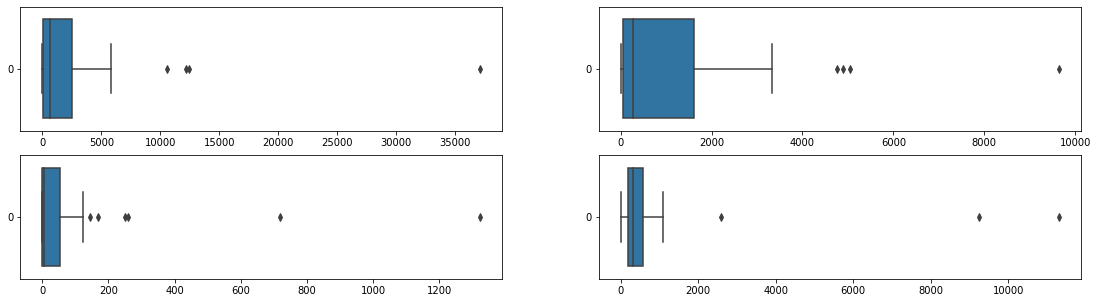

In [120]:
plt.figure(figsize=(19,5))
plt.subplot(221)
sns.boxplot(data=crnt['Confirmed'],orient='h')
plt.subplot(222)
sns.boxplot(data=crnt['Cured'],orient='h')
plt.subplot(223)
sns.boxplot(data=crnt['Deaths'],orient='h')
plt.subplot(224)
sns.boxplot(data=crnt['Density'],orient='h')
plt.show()

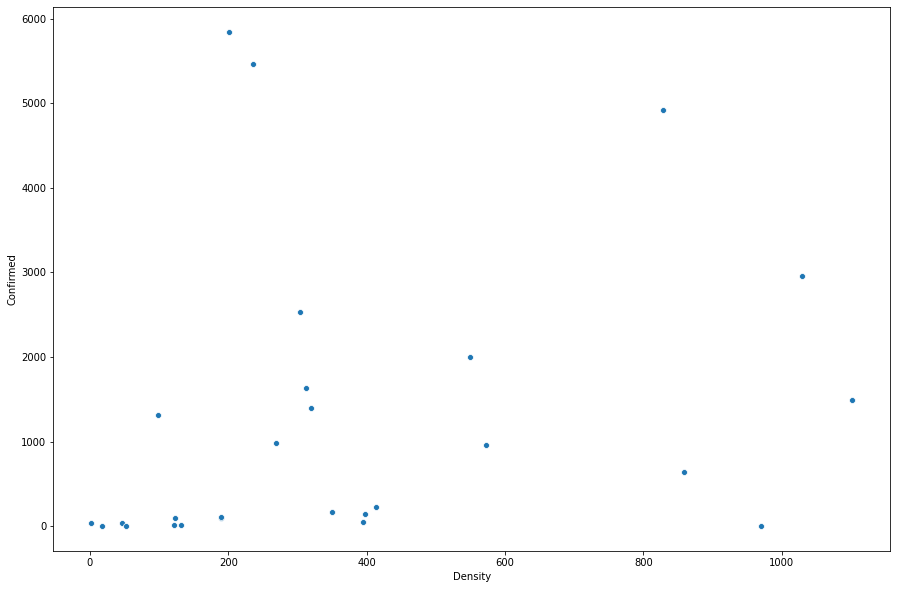

In [125]:
plt.figure(figsize=(15,10))
sns.scatterplot(
    data=crnt[(crnt['Confirmed']<8000) & (crnt['Density']<2000)],
    x='Density',
    y='Confirmed'
    )
plt.show()

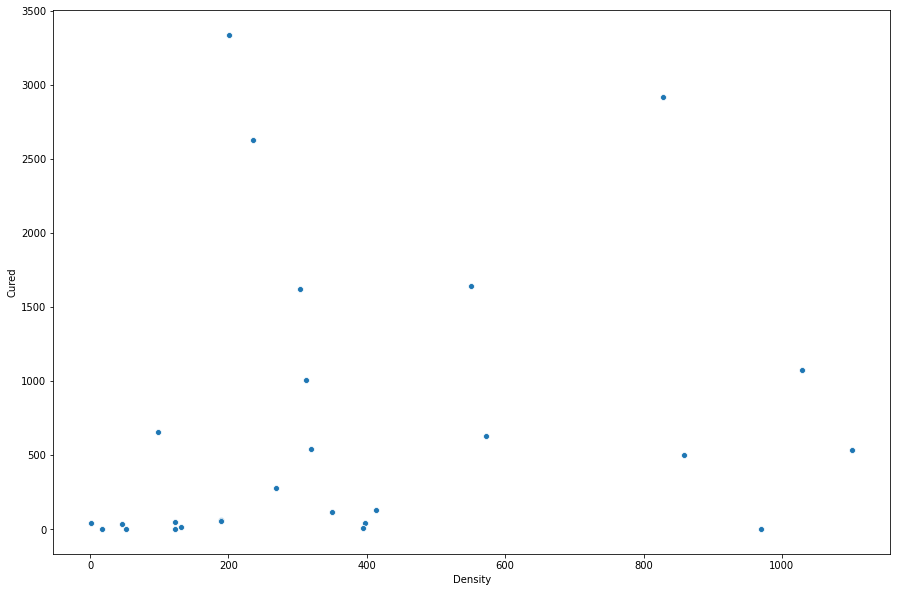

In [126]:
plt.figure(figsize=(15,10))
sns.scatterplot(
    data=crnt[(crnt['Cured']<4000) & (crnt['Density']<2000)],
    x='Density',
    y='Cured'
    )
plt.show()

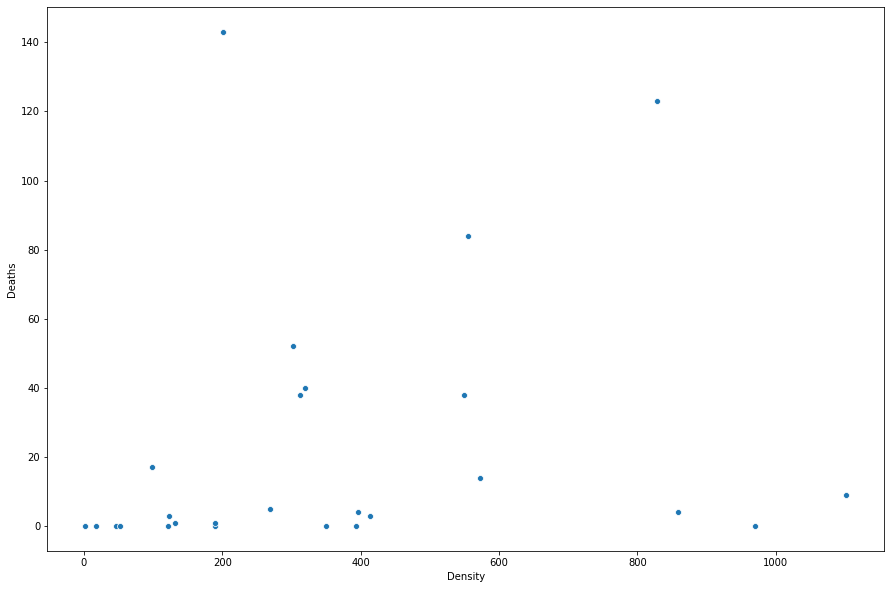

In [127]:
plt.figure(figsize=(15,10))
sns.scatterplot(
    data=crnt[(crnt['Deaths']<180) & (crnt['Density']<2000)],
    x='Density',
    y='Deaths'
    )
plt.show()